In [1]:
__depends__ = ['../outputs/llc_kuroshio_timeseries.nc']
__dest__ = ['../writeup/figs/fig2.pdf']

In [2]:
import datetime

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset

In [3]:
c1 = 'slateblue'
c2 = 'tomato'
c3 = 'k'
c4 = 'indigo'
plt.rcParams['lines.linewidth'] = 1.5
ap = .75

def leg_width(lg,fs):
    """"  Sets the linewidth of each legend object """
    for legobj in lg.legendHandles:
        legobj.set_linewidth(fs)
        

In [4]:
llc = Dataset(__depends__[0])

In [5]:
def parse_time(times):
    """
    
    Converts an array of strings that defines
    the LLC outputs into datatime arrays,
    e.g., '20110306T010000' --> datetime.datetime(2011, 3, 6, 1, 0)      
    
    Input
    ------
    times: array of strings that define LLC model time
    
    Output
    ------
    time: array of datetime associated with times
    
    """
    time = []
    for i in range(times.size):
        yr =  times[i][:4]
        mo =  times[i][4:6]
        day = times[i][6:8]
        hr =  times[i][9:11]
        time.append(datetime.datetime(int(yr),int(mo),int(day),int(hr)))  
    return np.array(time)

In [6]:
time2160 = parse_time(llc['2160']['hourly']['time'][:])
timed2160 = time2160[::24]

time4320 = parse_time(llc['4320']['hourly']['time'][:])
timed4320 = time4320[::24]

In [7]:
timeaviso = []
for i in range(llc['aviso']['time'][:].size):
    timeaviso.append(datetime.datetime.strptime(llc['aviso']['time'][i],'%d%m%Y'))

## Figure 2: time-series of RMS vertical vorticity, RMS laretal rate of strain, and  RMS horizontal divergence

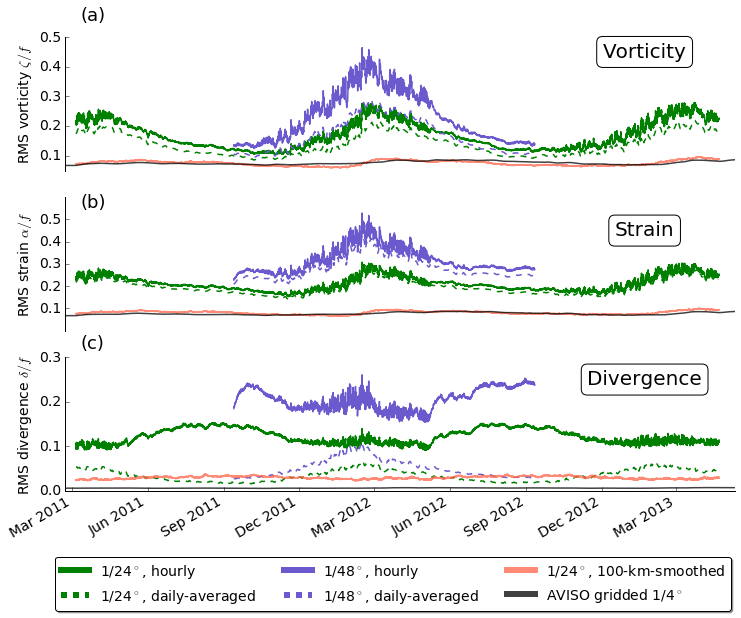

In [8]:
fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot(311)
plt.plot(time2160,llc['2160']['hourly/vorticity'][:],color='g',label=r'1/24$^\circ$, hourly') 
plt.plot(timed2160,llc['2160']['daily-averaged/vorticity'][:],'--',color='g',label='1/24$^\circ$, daily-averaged')
plt.plot(time4320,llc['4320']['hourly/vorticity'][:],color=c1,label=r'1/48$^\circ$, hourly')
plt.plot(timed4320,llc['4320']['daily-averaged/vorticity'][:],'--',color=c1,label='1/48$^\circ$, daily-averaged')
plt.plot(time2160,llc['2160']['smoothed100km/vorticity'][:],color='tomato',alpha=ap,label='1/24$^\circ$, 100-km-smoothed')
plt.plot(timeaviso,llc['aviso']['vorticity'][:],color='k',alpha=ap,label='AVISO gridded 1/4$^\circ$')


plt.text(timed2160[-90], .45, "Vorticity", size=20, rotation=0.,
         ha="center", va="center",
           bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.xticks([])
plt.ylabel(r'RMS vorticity $\zeta/f$')
plt.text(timed2160[5], .555,'(a)',fontsize=18)
ax.xaxis.tick_top()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([ .1, .2 ,.3, .4, .5])
lg = ax.legend(loc=(-.015,-3.3), ncol=3, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)


ax = fig.add_subplot(312)
plt.plot(time2160,llc['2160']['hourly/strain'][:],color='g',label=r'1/24$^\circ$, hourly') 
plt.plot(timed2160,llc['2160']['daily-averaged/strain'][:],'--',color='g',label='1/24$^\circ$, daily-averaged')
plt.plot(time4320,llc['4320']['hourly/strain'][:],color=c1,label=r'1/48$^\circ$, hourly')
plt.plot(timed4320,llc['4320']['daily-averaged/strain'][:],'--',color=c1,label='1/48$^\circ$, daily-averaged')
plt.plot(time2160,llc['2160']['smoothed100km/strain'][:],color='tomato',alpha=ap,label='1/24$^\circ$, 100-km-smoothed')
plt.plot(timeaviso,llc['aviso']['strain'][:],color='k',alpha=ap,label='AVISO')

plt.text(timed2160[-90], .45, "Strain", size=20, rotation=0.,
         ha="center", va="center",
           bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.xticks([])
plt.ylabel(r'RMS strain $\alpha/f$')
plt.text(timed2160[5], .555,'(b)',fontsize=18)
ax.xaxis.tick_top()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks([ .1, .2 ,.3, .4, .5])


ax = fig.add_subplot(313)
plt.plot(time2160,llc['2160']['hourly/divergence'][:],color='g',label=r'1/24$^\circ$, hourly') 
plt.plot(timed2160,llc['2160']['daily-averaged/divergence'][:],'--',color='g',label='1/24$^\circ$, daily-averaged')
plt.plot(time4320,llc['4320']['hourly/divergence'][:],color=c1,label=r'1/48$^\circ$, hourly')
plt.plot(timed4320,llc['4320']['daily-averaged/divergence'][:],'--',color=c1,label='1/48$^\circ$, daily-averaged')
plt.plot(time2160,llc['2160']['smoothed100km/divergence'][:],color='tomato',alpha=ap,label='1/24$^\circ$, 100-km-smoothed')
plt.plot(timeaviso,llc['aviso']['divergence'][:],color='k',alpha=ap,label='AVISO')

plt.yticks([0.,.1,.2,.3])

plt.text(timed2160[-90], .25, "Divergence", size=20, rotation=0.,
         ha="center", va="center",
           bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylabel(r'RMS divergence $\delta/f$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.text(timed2160[5], .32,'(c)',fontsize=18)

plt.gcf().autofmt_xdate()

#plt.savefig(__dest__[0],bbox_inches='tight')

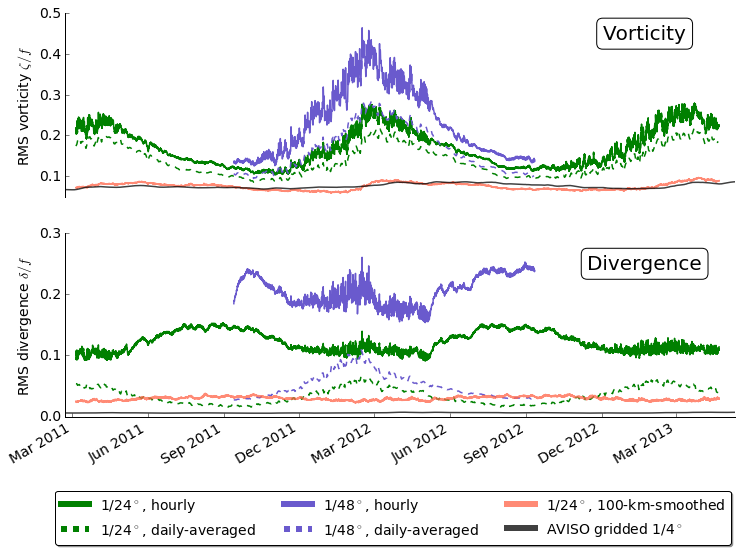

In [15]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(211)
plt.plot(time2160,llc['2160']['hourly/vorticity'][:],color='g',label=r'1/24$^\circ$, hourly') 
plt.plot(timed2160,llc['2160']['daily-averaged/vorticity'][:],'--',color='g',label='1/24$^\circ$, daily-averaged')
plt.plot(time4320,llc['4320']['hourly/vorticity'][:],color=c1,label=r'1/48$^\circ$, hourly')
plt.plot(timed4320,llc['4320']['daily-averaged/vorticity'][:],'--',color=c1,label='1/48$^\circ$, daily-averaged')
plt.plot(time2160,llc['2160']['smoothed100km/vorticity'][:],color='tomato',alpha=ap,label='1/24$^\circ$, 100-km-smoothed')
plt.plot(timeaviso,llc['aviso']['vorticity'][:],color='k',alpha=ap,label='AVISO gridded 1/4$^\circ$')


plt.text(timed2160[-90], .45, "Vorticity", size=20, rotation=0.,
         ha="center", va="center",
           bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.xticks([])
plt.ylabel(r'RMS vorticity $\zeta/f$')
#plt.text(timed2160[5], .555,'(a)',fontsize=18)
ax.xaxis.tick_top()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.yticks([ .1, .2 ,.3, .4, .5])
lg = ax.legend(loc=(-.015,-1.9), ncol=3, fancybox=True,frameon=True, shadow=True)
leg_width(lg,fs=6)


ax = fig.add_subplot(212)
plt.plot(time2160,llc['2160']['hourly/divergence'][:],color='g',label=r'1/24$^\circ$, hourly') 
plt.plot(timed2160,llc['2160']['daily-averaged/divergence'][:],'--',color='g',label='1/24$^\circ$, daily-averaged')
plt.plot(time4320,llc['4320']['hourly/divergence'][:],color=c1,label=r'1/48$^\circ$, hourly')
plt.plot(timed4320,llc['4320']['daily-averaged/divergence'][:],'--',color=c1,label='1/48$^\circ$, daily-averaged')
plt.plot(time2160,llc['2160']['smoothed100km/divergence'][:],color='tomato',alpha=ap,label='1/24$^\circ$, 100-km-smoothed')
plt.plot(timeaviso,llc['aviso']['divergence'][:],color='k',alpha=ap,label='AVISO')

plt.yticks([0.,.1,.2,.3])

plt.text(timed2160[-90], .25, "Divergence", size=20, rotation=0.,
         ha="center", va="center",
           bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylabel(r'RMS divergence $\delta/f$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#plt.text(timed2160[5], .32,'(c)',fontsize=18)

plt.gcf().autofmt_xdate()

plt.savefig("/Users/crocha/Desktop/fig2.png",bbox_inches='tight')